In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

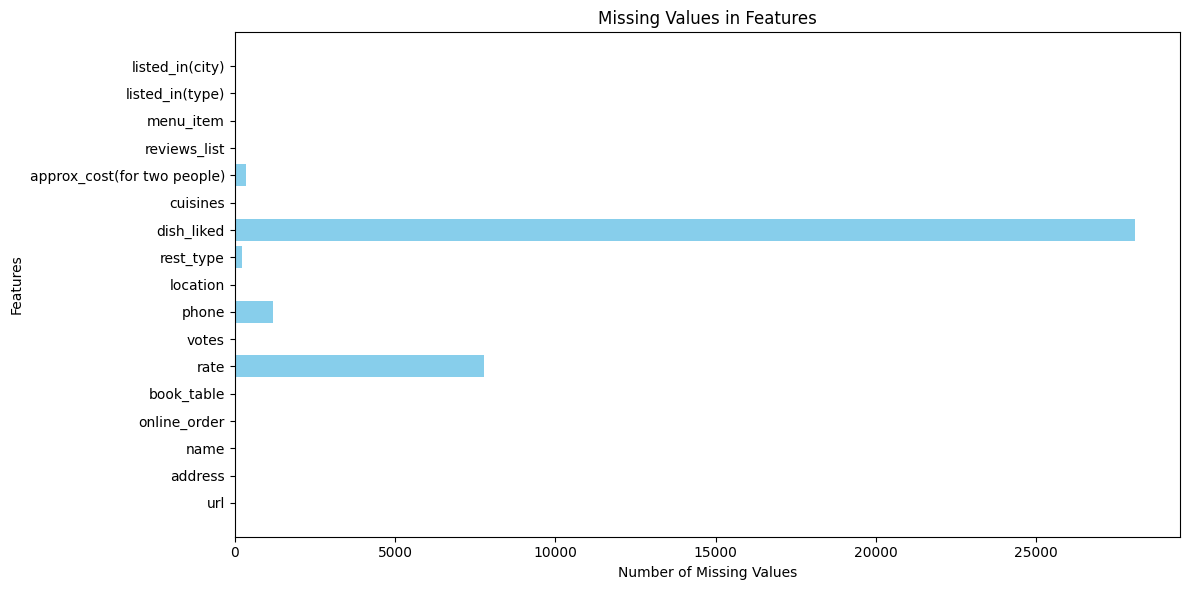

In [5]:
import matplotlib.pyplot as plt

# Data for features and missing values
features = [
    "url", "address", "name", "online_order", "book_table", "rate",
    "votes", "phone", "location", "rest_type", "dish_liked", "cuisines",
    "approx_cost(for two people)", "reviews_list", "menu_item", "listed_in(type)", "listed_in(city)"
]
missing_values = [
    0, 0, 0, 0, 0, 7775, 0, 1208, 21, 227, 28078, 45, 346, 0, 0, 0, 0
]

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(features, missing_values, color='skyblue')
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")
plt.title("Missing Values in Features")
plt.tight_layout()
plt.show()


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          23193 non-null  object
 1   address                      23193 non-null  object
 2   name                         23193 non-null  object
 3   online_order                 23193 non-null  object
 4   book_table                   23193 non-null  object
 5   rate                         23193 non-null  object
 6   votes                        23193 non-null  int64 
 7   phone                        23193 non-null  object
 8   location                     23193 non-null  object
 9   rest_type                    23193 non-null  object
 10  dish_liked                   23193 non-null  object
 11  cuisines                     23193 non-null  object
 12  approx_cost(for two people)  23193 non-null  object
 13  reviews_list                 23193 n

In [9]:
# we are only taking top 4 rest_types

In [10]:
type_dict = ['Casual Dining','Quick Bites','Cafe','Dessert Parlor']
new_df = df[df['rest_type'].isin(type_dict)]

In [11]:
new_df['rest_type'].value_counts()

rest_type
Casual Dining     7349
Quick Bites       5240
Cafe              2325
Dessert Parlor    1076
Name: count, dtype: int64

In [12]:
new_df.info()   # 15990 rows

<class 'pandas.core.frame.DataFrame'>
Index: 15990 entries, 0 to 51645
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          15990 non-null  object
 1   address                      15990 non-null  object
 2   name                         15990 non-null  object
 3   online_order                 15990 non-null  object
 4   book_table                   15990 non-null  object
 5   rate                         15990 non-null  object
 6   votes                        15990 non-null  int64 
 7   phone                        15990 non-null  object
 8   location                     15990 non-null  object
 9   rest_type                    15990 non-null  object
 10  dish_liked                   15990 non-null  object
 11  cuisines                     15990 non-null  object
 12  approx_cost(for two people)  15990 non-null  object
 13  reviews_list                 15990 n

In [13]:
type(new_df['approx_cost(for two people)'][0])

str

In [14]:
new_df['listed_in(type)'].value_counts()

listed_in(type)
Delivery              7970
Dine-out              6056
Cafes                  734
Desserts               714
Buffet                 507
Drinks & nightlife       5
Pubs and bars            4
Name: count, dtype: int64

In [15]:
print("RATED\\n ")

RATED\n 


In [16]:
# url   
# address + name  
# rate
# rest_type  
# cuisines   
# approx_cost(for two people)
# reviews_list   
# listed_in(type)

In [17]:
final_df = new_df[['url','address','name','rate','rest_type','cuisines','approx_cost(for two people)','reviews_list','listed_in(type)']]
final_df.head(3)

,url,address,name,rate,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1/5,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1/5,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7/5,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet


In [18]:
final_df['restaurant'] = final_df['name'] + ', ' + final_df['address']

C:\Users\91830\AppData\Local\Temp\ipykernel_16368\2446531546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['restaurant'] = final_df['name'] + ', ' + final_df['address']


In [19]:
final_df.head()  

,url,address,name,rate,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),restaurant
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1/5,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1/5,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ..."
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7/5,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,"Addhuri Udupi Bhojana, 1st Floor, Annakuteera,..."
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8/5,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,"Grand Village, 10, 3rd Floor, Lakshmi Associat..."
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,3.8/5,Casual Dining,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,"Timepass Dinner, 37, 5-1, 4th Floor, Bosco Cou..."


In [20]:
final_df.drop(['name','address'],axis='columns',inplace=True)

C:\Users\91830\AppData\Local\Temp\ipykernel_16368\219253842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(['name','address'],axis='columns',inplace=True)


In [21]:
final_df.duplicated().sum()

0

In [22]:
final_df.isnull().sum()

url                            0
rate                           0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
restaurant                     0
dtype: int64

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15990 entries, 0 to 51645
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          15990 non-null  object
 1   rate                         15990 non-null  object
 2   rest_type                    15990 non-null  object
 3   cuisines                     15990 non-null  object
 4   approx_cost(for two people)  15990 non-null  object
 5   reviews_list                 15990 non-null  object
 6   listed_in(type)              15990 non-null  object
 7   restaurant                   15990 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [24]:
final_df.reset_index(drop=True,inplace=True)

In [25]:
final_df.head(3)

,url,rate,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),restaurant
0,https://www.zomato.com/bangalore/jalsa-banasha...,4.1/5,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
1,https://www.zomato.com/bangalore/spice-elephan...,4.1/5,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ..."
2,https://www.zomato.com/bangalore/addhuri-udupi...,3.7/5,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,"Addhuri Udupi Bhojana, 1st Floor, Annakuteera,..."


In [26]:
final_df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [27]:
print("'RATED")

'RATED


In [28]:
# removing  \n  and  \'RATED

In [29]:
final_df['reviews_list'] = final_df['reviews_list'].apply(lambda x:x.replace("\\n","")).apply(lambda x: x.replace("'RATED  ",""))

C:\Users\91830\AppData\Local\Temp\ipykernel_16368\3453633271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['reviews_list'] = final_df['reviews_list'].apply(lambda x:x.replace("\\n","")).apply(lambda x: x.replace("'RATED  ",""))


In [30]:
final_df['reviews_list'][0]

'[(\'Rated 4.0\', A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.Cheers\'), (\'Rated 2.0\', Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visited by vegetarians. Any

In [31]:
df['rate'].value_counts().index

Index(['3.9/5', '3.9 /5', '4.0/5', '4.1/5', '4.0 /5', '4.1 /5', '3.8/5',
       '3.8 /5', '4.2 /5', '4.2/5', '4.3 /5', '3.7/5', '4.3/5', '3.7 /5',
       '4.4 /5', '4.4/5', '3.6/5', '3.6 /5', '4.5 /5', '3.5/5', '4.5/5',
       '3.5 /5', '3.4 /5', '3.0/5', '2.9/5', '4.6 /5', '3.4/5', '3.1/5',
       '2.8 /5', '2.8/5', 'NEW', '3.1 /5', '2.9 /5', '3.2/5', '3.3/5', '4.6/5',
       '3.2 /5', '3.0 /5', '2.7/5', '3.3 /5', '4.7 /5', '2.7 /5', '4.7/5',
       '2.6/5', '2.6 /5', '4.8 /5', '2.5 /5', '2.4/5', '4.9 /5', '4.9/5',
       '2.3/5', '2.5/5', '2.4 /5', '4.8/5', '2.3 /5', '2.2/5', '2.1 /5',
       '2.1/5', '2.2 /5', '2.0 /5', '2.0/5', '1.8 /5', '1.8/5'],
      dtype='object', name='rate')

In [32]:
# rate column has a value 'NEW'
# we need to remove it

In [33]:
final_df = final_df[final_df['rate'] != 'NEW']

In [34]:
final_df['rate']

0         4.1/5
1         4.1/5
2         3.7/5
3         3.8/5
4         3.8/5
          ...  
15985    3.8 /5
15986    3.6 /5
15987    4.2 /5
15988    3.4 /5
15989    3.6 /5
Name: rate, Length: 15917, dtype: object

In [35]:
def convert2(obj):
    num = float(obj.replace('/5',''))
    return num

In [36]:
final_df['rate'] = final_df['rate'].apply(convert2)

In [37]:
final_df.rename(columns={'rate':'Avg. ratings'},inplace=True)

In [38]:
final_df['Avg. ratings'].value_counts().index

Index([3.9, 4.0, 3.8, 4.1, 4.2, 3.7, 4.3, 3.6, 4.4, 3.5, 4.5, 3.4, 2.8, 3.0,
       3.1, 2.9, 3.2, 3.3, 2.7, 4.6, 2.6, 4.7, 2.5, 2.4, 2.3, 4.8, 4.9, 2.2,
       2.1, 1.8, 2.0],
      dtype='float64', name='Avg. ratings')

In [39]:
# converting back to string so that we can form tags

final_df['Avg. ratings'] = final_df['Avg. ratings'].astype('str')

In [40]:
# Avg. ratings column done

In [41]:
final_df.reset_index(drop=True,inplace=True)

In [42]:
final_df['approx_cost(for two people)'].value_counts().index

Index(['400', '600', '500', '800', '300', '700', '1,000', '200', '750', '450',
       '650', '250', '350', '550', '900', '1,200', '1,500', '150', '1,100',
       '1,300', '1,600', '1,400', '850', '100', '1,800', '1,700', '2,000',
       '950', '2,100', '180', '1,900', '230', '2,500', '1,350', '2,200', '40',
       '1,250', '1,050', '120'],
      dtype='object', name='approx_cost(for two people)')

In [43]:
final_df['Avg. ratings']

0        4.1
1        4.1
2        3.7
3        3.8
4        3.8
        ... 
15912    3.8
15913    3.6
15914    4.2
15915    3.4
15916    3.6
Name: Avg. ratings, Length: 15917, dtype: object

In [44]:
final_df['restaurant'][1]

'Spice Elephant, 2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore'

In [45]:
final_df.head(3)

,url,Avg. ratings,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),restaurant
0,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', A beautiful place to dine in.Th...",Buffet,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
1,https://www.zomato.com/bangalore/spice-elephan...,4.1,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', Had been here for dinner with f...",Buffet,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ..."
2,https://www.zomato.com/bangalore/addhuri-udupi...,3.7,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED Great food and proper K...",Buffet,"Addhuri Udupi Bhojana, 1st Floor, Annakuteera,..."


In [46]:
final_df[final_df['restaurant'] == 'Jalsa, 942, 21st Main Road, 2nd Stage, Banashankari, Bangalore']['reviews_list'].values[0]

'[(\'Rated 4.0\', A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.Cheers\'), (\'Rated 2.0\', Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visited by vegetarians. Any

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15917 entries, 0 to 15916
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          15917 non-null  object
 1   Avg. ratings                 15917 non-null  object
 2   rest_type                    15917 non-null  object
 3   cuisines                     15917 non-null  object
 4   approx_cost(for two people)  15917 non-null  object
 5   reviews_list                 15917 non-null  object
 6   listed_in(type)              15917 non-null  object
 7   restaurant                   15917 non-null  object
dtypes: object(8)
memory usage: 994.9+ KB


In [48]:
final_df[final_df['restaurant'] == 'Jalsa, 942, 21st Main Road, 2nd Stage, Banashankari, Bangalore']

,url,Avg. ratings,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),restaurant
0,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', A beautiful place to dine in.Th...",Buffet,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
178,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', A beautiful place to dine in.Th...",Delivery,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
210,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', A beautiful place to dine in.Th...",Dine-out,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
742,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', A beautiful place to dine in.Th...",Buffet,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
967,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', A beautiful place to dine in.Th...",Delivery,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
1131,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', Super ambienceGreat food with s...",Dine-out,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
5905,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', A beautiful place to dine in.Th...",Buffet,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
6322,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', A beautiful place to dine in.Th...",Delivery,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."
6581,https://www.zomato.com/bangalore/jalsa-banasha...,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', A beautiful place to dine in.Th...",Dine-out,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha..."


In [49]:
rest_name = []
rest_listed = []
rest_reviews = []
rest_url = []
ratings = []
cost = []
rest_cuisines = []
rest_typee = []

def convert1(restaurant_name):
    rest_name.append(restaurant_name)
    rest_listed.append(list(final_df[final_df['restaurant'] == restaurant_name]['listed_in(type)'].unique()))
    rest_reviews.append(final_df[final_df['restaurant'] == restaurant_name]['reviews_list'].values[0])
    rest_url.append(final_df[final_df['restaurant'] == restaurant_name]['url'].values[0])
    ratings.append(final_df[final_df['restaurant'] == restaurant_name]['Avg. ratings'].values[0])
    cost.append(final_df[final_df['restaurant'] == restaurant_name]['approx_cost(for two people)'].values[0])
    rest_cuisines.append(final_df[final_df['restaurant'] == restaurant_name]['cuisines'].values[0])
    rest_typee.append(final_df[final_df['restaurant'] == restaurant_name]['rest_type'].values[0])

In [50]:
final_df['restaurant'].apply(convert1)

0        None
1        None
2        None
3        None
4        None
         ... 
15912    None
15913    None
15914    None
15915    None
15916    None
Name: restaurant, Length: 15917, dtype: object

In [51]:
type(rest_listed[0])

list

In [52]:
len(rest_name), len(rest_listed), len(rest_reviews), len(rest_url), len(ratings), len(cost), len(rest_cuisines), len(rest_typee)

(15917, 15917, 15917, 15917, 15917, 15917, 15917, 15917)

In [53]:
temp_df = pd.DataFrame()

temp_df['rest_name'] = rest_name
temp_df['rest_listed'] = rest_listed
temp_df['rest_reviews'] = rest_reviews
temp_df['rest_url'] = rest_url
temp_df['Avg.ratings'] = ratings
temp_df['Approx_cost'] = cost
temp_df['cuisines'] = rest_cuisines
temp_df['rest_type'] = rest_typee

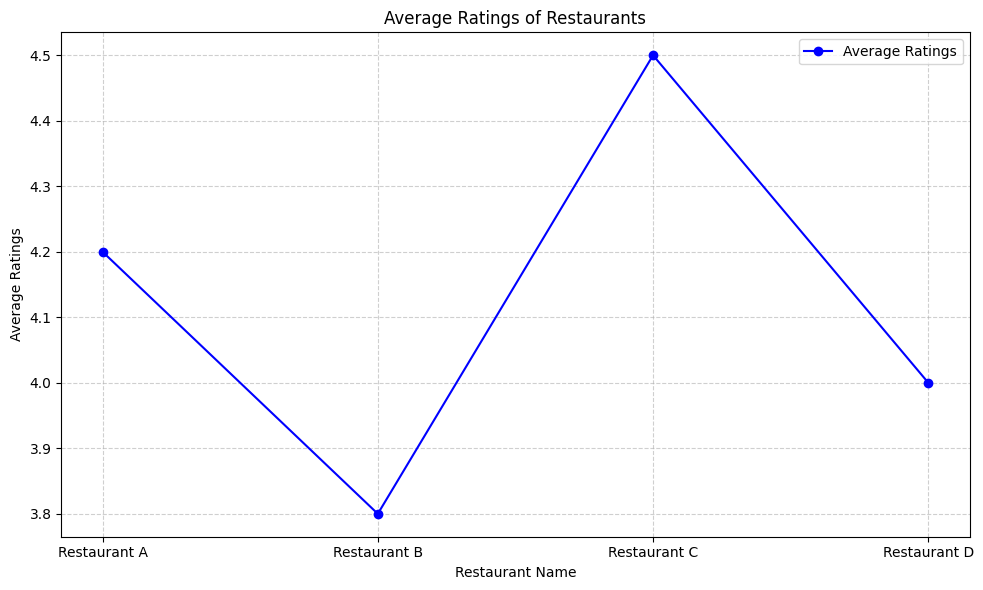

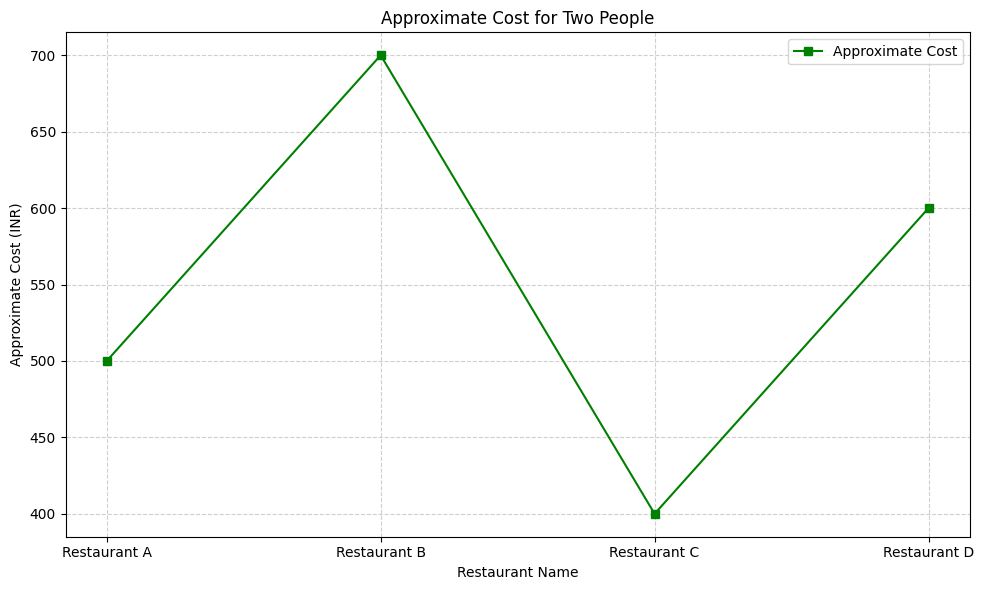

In [54]:
##############################################################1
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with actual data)
temp_df = pd.DataFrame({
    'rest_name': ['Restaurant A', 'Restaurant B', 'Restaurant C', 'Restaurant D'],
    'rest_listed': ['City A', 'City B', 'City A', 'City B'],
    'rest_reviews': [120, 340, 210, 450],
    'rest_url': ['url_a', 'url_b', 'url_c', 'url_d'],
    'Avg.ratings': [4.2, 3.8, 4.5, 4.0],
    'Approx_cost': [500, 700, 400, 600],
    'cuisines': ['Indian', 'Italian', 'Chinese', 'Mexican'],
    'rest_type': ['Casual Dining', 'Cafe', 'Quick Bites', 'Fine Dining']
})

# Plot line chart for Average Ratings vs. Restaurant Name
plt.figure(figsize=(10, 6))
plt.plot(temp_df['rest_name'], temp_df['Avg.ratings'], marker='o', linestyle='-', color='blue', label='Average Ratings')

# Customize the plot
plt.title('Average Ratings of Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Ratings')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

# Plot line chart for Approximate Cost vs. Restaurant Name
plt.figure(figsize=(10, 6))
plt.plot(temp_df['rest_name'], temp_df['Approx_cost'], marker='s', linestyle='-', color='green', label='Approximate Cost')

# Customize the plot
plt.title('Approximate Cost for Two People')
plt.xlabel('Restaurant Name')
plt.ylabel('Approximate Cost (INR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


In [55]:
temp_df.head(3)

,rest_name,rest_listed,rest_reviews,rest_url,Avg.ratings,Approx_cost,cuisines,rest_type
0,Restaurant A,City A,120,url_a,4.2,500,Indian,Casual Dining
1,Restaurant B,City B,340,url_b,3.8,700,Italian,Cafe
2,Restaurant C,City A,210,url_c,4.5,400,Chinese,Quick Bites


In [56]:
type(temp_df['rest_reviews'][0])

numpy.int64

In [57]:
# conversion from list to str  ( rest_type )

def convert0(obj):
    return ' '.join(obj)

In [58]:
temp_df['rest_listed'] = temp_df['rest_listed'].apply(convert0)

In [59]:
temp_df.head()

,rest_name,rest_listed,rest_reviews,rest_url,Avg.ratings,Approx_cost,cuisines,rest_type
0,Restaurant A,C i t y A,120,url_a,4.2,500,Indian,Casual Dining
1,Restaurant B,C i t y B,340,url_b,3.8,700,Italian,Cafe
2,Restaurant C,C i t y A,210,url_c,4.5,400,Chinese,Quick Bites
3,Restaurant D,C i t y B,450,url_d,4.0,600,Mexican,Fine Dining


In [60]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rest_name     4 non-null      object 
 1   rest_listed   4 non-null      object 
 2   rest_reviews  4 non-null      int64  
 3   rest_url      4 non-null      object 
 4   Avg.ratings   4 non-null      float64
 5   Approx_cost   4 non-null      int64  
 6   cuisines      4 non-null      object 
 7   rest_type     4 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 388.0+ bytes


In [61]:
temp_df.drop_duplicates(inplace=True)
temp_df.reset_index(drop=True,inplace=True)

In [62]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rest_name     4 non-null      object 
 1   rest_listed   4 non-null      object 
 2   rest_reviews  4 non-null      int64  
 3   rest_url      4 non-null      object 
 4   Avg.ratings   4 non-null      float64
 5   Approx_cost   4 non-null      int64  
 6   cuisines      4 non-null      object 
 7   rest_type     4 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 388.0+ bytes


In [63]:
temp_df.head()

,rest_name,rest_listed,rest_reviews,rest_url,Avg.ratings,Approx_cost,cuisines,rest_type
0,Restaurant A,C i t y A,120,url_a,4.2,500,Indian,Casual Dining
1,Restaurant B,C i t y B,340,url_b,3.8,700,Italian,Cafe
2,Restaurant C,C i t y A,210,url_c,4.5,400,Chinese,Quick Bites
3,Restaurant D,C i t y B,450,url_d,4.0,600,Mexican,Fine Dining


In [64]:
# now temp_df is the desired dataframe

In [65]:
type(temp_df['rest_reviews'][0])

numpy.int64

In [66]:
def convert3(obj):
    num = obj.replace(',','')
    return num

In [67]:
# removing commas

In [68]:
temp_df['Approx_cost'] = temp_df['Approx_cost'].apply(convert3)

AttributeError: 'int' object has no attribute 'replace'

In [ ]:
temp_df['Approx_cost'].value_counts().index

Index(['400', '500', '600', '300', '800', '700', '200', '450', '750', '250',
       '1000', '350', '650', '550', '150', '900', '1200', '1500', '850',
       '1100', '100', '1600', '1400', '1300', '2000', '1800', '1700', '950',
       '40', '1900', '2500', '1250', '180', '2200', '2100', '1350', '230',
       '1050', '120'],
      dtype='object', name='Approx_cost')

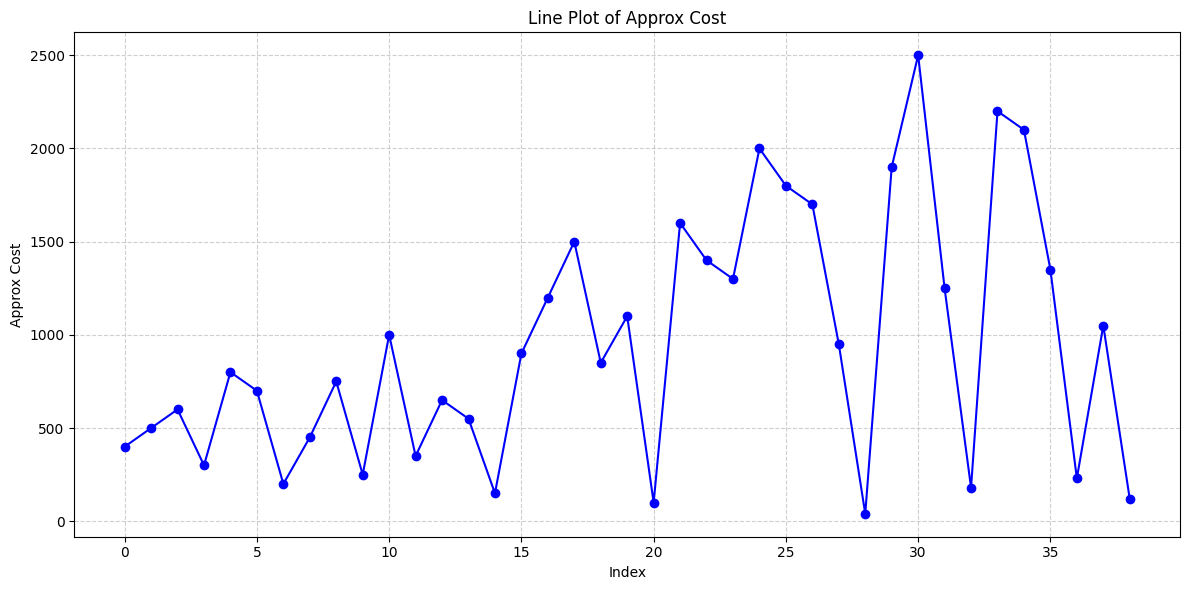

In [ ]:
####################################################2
import matplotlib.pyplot as plt

# Data for the line plot
approx_cost = [
    400, 500, 600, 300, 800, 700, 200, 450, 750, 250, 1000, 350, 650, 550, 
    150, 900, 1200, 1500, 850, 1100, 100, 1600, 1400, 1300, 2000, 1800, 1700, 
    950, 40, 1900, 2500, 1250, 180, 2200, 2100, 1350, 230, 1050, 120
]

# Generate indices for the x-axis
indices = list(range(len(approx_cost)))

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(indices, approx_cost, marker='o', color='blue', linestyle='-', linewidth=1.5)
plt.xlabel("Index")
plt.ylabel("Approx Cost")
plt.title("Line Plot of Approx Cost")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
temp_df.head(2)

,rest_name,rest_listed,rest_reviews,rest_url,Avg.ratings,Approx_cost,cuisines,rest_type
0,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha...",Buffet Delivery Dine-out,"[('Rated 4.0', A beautiful place to dine in.Th...",https://www.zomato.com/bangalore/jalsa-banasha...,4.1,800,"North Indian, Mughlai, Chinese",Casual Dining
1,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ...",Buffet Delivery Dine-out,"[('Rated 4.0', Had been here for dinner with f...",https://www.zomato.com/bangalore/spice-elephan...,4.1,800,"Chinese, North Indian, Thai",Casual Dining


In [ ]:
# conversion to list in the desired format so that we can concat them

temp_df['rest_type'] = temp_df['rest_type'].apply(lambda x: x.replace(' ','')).apply(lambda x: x.split())
temp_df['cuisines'] = temp_df['cuisines'].apply(lambda x: x.replace(' ','')).apply(lambda x: x.split(','))
temp_df['Avg.ratings'] = temp_df['Avg.ratings'].apply(lambda x:x.split())
temp_df['Approx_cost'] = temp_df['Approx_cost'].apply(lambda x:x.split())
temp_df['rest_listed'] = temp_df['rest_listed'].apply(lambda x: x.replace('-','')).apply(lambda x: x.split())

In [ ]:
temp_df.head(2)

,rest_name,rest_listed,rest_reviews,rest_url,Avg.ratings,Approx_cost,cuisines,rest_type
0,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha...","[Buffet, Delivery, Dineout]","[('Rated 4.0', A beautiful place to dine in.Th...",https://www.zomato.com/bangalore/jalsa-banasha...,[4.1],[800],"[NorthIndian, Mughlai, Chinese]",[CasualDining]
1,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ...","[Buffet, Delivery, Dineout]","[('Rated 4.0', Had been here for dinner with f...",https://www.zomato.com/bangalore/spice-elephan...,[4.1],[800],"[Chinese, NorthIndian, Thai]",[CasualDining]


In [ ]:
# forming tags

# creating a new column named 'tags'

In [ ]:
temp_df['tags'] = temp_df['rest_type'] + temp_df['cuisines'] + temp_df['rest_listed'] + temp_df['Approx_cost'] + temp_df['Avg.ratings']

In [ ]:
temp_df.head()

,rest_name,rest_listed,rest_reviews,rest_url,Avg.ratings,Approx_cost,cuisines,rest_type,tags
0,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha...","[Buffet, Delivery, Dineout]","[('Rated 4.0', A beautiful place to dine in.Th...",https://www.zomato.com/bangalore/jalsa-banasha...,[4.1],[800],"[NorthIndian, Mughlai, Chinese]",[CasualDining],"[CasualDining, NorthIndian, Mughlai, Chinese, ..."
1,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ...","[Buffet, Delivery, Dineout]","[('Rated 4.0', Had been here for dinner with f...",https://www.zomato.com/bangalore/spice-elephan...,[4.1],[800],"[Chinese, NorthIndian, Thai]",[CasualDining],"[CasualDining, Chinese, NorthIndian, Thai, Buf..."
2,"Addhuri Udupi Bhojana, 1st Floor, Annakuteera,...","[Buffet, Dineout]","[('Rated 4.0', ""RATED Great food and proper K...",https://www.zomato.com/bangalore/addhuri-udupi...,[3.7],[300],"[SouthIndian, NorthIndian]",[QuickBites],"[QuickBites, SouthIndian, NorthIndian, Buffet,..."
3,"Grand Village, 10, 3rd Floor, Lakshmi Associat...","[Buffet, Dineout]","[('Rated 4.0', Very good restaurant in neighbo...",https://www.zomato.com/bangalore/grand-village...,[3.8],[600],"[NorthIndian, Rajasthani]",[CasualDining],"[CasualDining, NorthIndian, Rajasthani, Buffet..."
4,"Timepass Dinner, 37, 5-1, 4th Floor, Bosco Cou...","[Buffet, Delivery, Dineout]","[('Rated 3.0', Food 3/5Ambience 3/5Service 3/5...",https://www.zomato.com/bangalore/timepass-dinn...,[3.8],[600],[NorthIndian],[CasualDining],"[CasualDining, NorthIndian, Buffet, Delivery, ..."


In [ ]:
zomato_df = temp_df[['rest_url','rest_name','rest_reviews','tags']]

# this is the final dataframe

In [ ]:
zomato_df.head(3)

,rest_url,rest_name,rest_reviews,tags
0,https://www.zomato.com/bangalore/jalsa-banasha...,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha...","[('Rated 4.0', A beautiful place to dine in.Th...","[CasualDining, NorthIndian, Mughlai, Chinese, ..."
1,https://www.zomato.com/bangalore/spice-elephan...,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ...","[('Rated 4.0', Had been here for dinner with f...","[CasualDining, Chinese, NorthIndian, Thai, Buf..."
2,https://www.zomato.com/bangalore/addhuri-udupi...,"Addhuri Udupi Bhojana, 1st Floor, Annakuteera,...","[('Rated 4.0', ""RATED Great food and proper K...","[QuickBites, SouthIndian, NorthIndian, Buffet,..."


In [ ]:
zomato_df['rest_reviews'].values

array(['[(\'Rated 4.0\', A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.Cheers\'), (\'Rated 2.0\', Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visited by vegetaria

In [ ]:
import re

def con(text):
    lower_msg = text.lower()
    msg = re.sub('[^a-wy-z ]','',lower_msg)
    return msg.split()

In [ ]:
zomato_df['rest_reviews'] = zomato_df['rest_reviews'].apply(con)

C:\Users\91830\AppData\Local\Temp\ipykernel_13632\3388494096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_df['rest_reviews'] = zomato_df['rest_reviews'].apply(con)


In [ ]:
zomato_df['rest_reviews'][0]

['rated',
 'a',
 'beautiful',
 'place',
 'to',
 'dine',
 'inthe',
 'interiors',
 'take',
 'you',
 'back',
 'to',
 'the',
 'mughal',
 'era',
 'the',
 'lightings',
 'are',
 'just',
 'perfectwe',
 'went',
 'there',
 'on',
 'the',
 'occasion',
 'of',
 'christmas',
 'and',
 'so',
 'they',
 'had',
 'only',
 'limited',
 'items',
 'available',
 'but',
 'the',
 'taste',
 'and',
 'service',
 'was',
 'not',
 'compromised',
 'at',
 'allthe',
 'only',
 'complaint',
 'is',
 'that',
 'the',
 'breads',
 'could',
 'have',
 'been',
 'betterwould',
 'surely',
 'like',
 'to',
 'come',
 'here',
 'again',
 'rated',
 'i',
 'was',
 'here',
 'for',
 'dinner',
 'with',
 'my',
 'family',
 'on',
 'a',
 'weekday',
 'the',
 'restaurant',
 'was',
 'completely',
 'empty',
 'ambience',
 'is',
 'good',
 'with',
 'some',
 'good',
 'old',
 'hindi',
 'music',
 'seating',
 'arrangement',
 'are',
 'good',
 'too',
 'we',
 'ordered',
 'masala',
 'papad',
 'panner',
 'and',
 'baby',
 'corn',
 'starters',
 'lemon',
 'and',
 'co

In [ ]:
zomato_df.head()

,rest_url,rest_name,rest_reviews,tags
0,https://www.zomato.com/bangalore/jalsa-banasha...,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha...","[rated, a, beautiful, place, to, dine, inthe, ...","[CasualDining, NorthIndian, Mughlai, Chinese, ..."
1,https://www.zomato.com/bangalore/spice-elephan...,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ...","[rated, had, been, here, for, dinner, with, fa...","[CasualDining, Chinese, NorthIndian, Thai, Buf..."
2,https://www.zomato.com/bangalore/addhuri-udupi...,"Addhuri Udupi Bhojana, 1st Floor, Annakuteera,...","[rated, rated, great, food, and, proper, karna...","[QuickBites, SouthIndian, NorthIndian, Buffet,..."
3,https://www.zomato.com/bangalore/grand-village...,"Grand Village, 10, 3rd Floor, Lakshmi Associat...","[rated, very, good, restaurant, in, neighbourh...","[CasualDining, NorthIndian, Rajasthani, Buffet..."
4,https://www.zomato.com/bangalore/timepass-dinn...,"Timepass Dinner, 37, 5-1, 4th Floor, Bosco Cou...","[rated, food, ambience, service, had, been, he...","[CasualDining, NorthIndian, Buffet, Delivery, ..."


In [ ]:
# now we will merge 'rest_reviews' and 'tag' columns

In [ ]:
zomato_df['tag'] = zomato_df['rest_reviews'] + zomato_df['tags']

C:\Users\91830\AppData\Local\Temp\ipykernel_13632\3196316430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_df['tag'] = zomato_df['rest_reviews'] + zomato_df['tags']


In [ ]:
zomato_df.drop(['rest_reviews','tags'],axis='columns',inplace=True)

C:\Users\91830\AppData\Local\Temp\ipykernel_13632\971715153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_df.drop(['rest_reviews','tags'],axis='columns',inplace=True)


In [ ]:
# now we will convert this 'tag' column from list to str

In [ ]:
zomato_df['tag'] = zomato_df['tag'].apply(lambda x: ' '.join(x))

C:\Users\91830\AppData\Local\Temp\ipykernel_13632\2194066503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_df['tag'] = zomato_df['tag'].apply(lambda x: ' '.join(x))


In [ ]:
zomato_df.head()

,rest_url,rest_name,tag
0,https://www.zomato.com/bangalore/jalsa-banasha...,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha...",rated a beautiful place to dine inthe interior...
1,https://www.zomato.com/bangalore/spice-elephan...,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ...",rated had been here for dinner with family tur...
2,https://www.zomato.com/bangalore/addhuri-udupi...,"Addhuri Udupi Bhojana, 1st Floor, Annakuteera,...",rated rated great food and proper karnataka st...
3,https://www.zomato.com/bangalore/grand-village...,"Grand Village, 10, 3rd Floor, Lakshmi Associat...",rated very good restaurant in neighbourhood bu...
4,https://www.zomato.com/bangalore/timepass-dinn...,"Timepass Dinner, 37, 5-1, 4th Floor, Bosco Cou...",rated food ambience service had been here for ...


In [ ]:
zomato_df['tag'][0]

'rated a beautiful place to dine inthe interiors take you back to the mughal era the lightings are just perfectwe went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at allthe only complaint is that the breads could have been betterwould surely like to come here again rated i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangoutcheers rated its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food 

In [ ]:
# converting everything again in lowercase

zomato_df['tag'] = zomato_df['tag'].apply(lambda x: x.lower())

C:\Users\91830\AppData\Local\Temp\ipykernel_13632\1984732976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_df['tag'] = zomato_df['tag'].apply(lambda x: x.lower())


In [ ]:
zomato_df['tag'][0]

'rated a beautiful place to dine inthe interiors take you back to the mughal era the lightings are just perfectwe went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at allthe only complaint is that the breads could have been betterwould surely like to come here again rated i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangoutcheers rated its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food 

In [ ]:
zomato_df.head()

,rest_url,rest_name,tag
0,https://www.zomato.com/bangalore/jalsa-banasha...,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha...",rated a beautiful place to dine inthe interior...
1,https://www.zomato.com/bangalore/spice-elephan...,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ...",rated had been here for dinner with family tur...
2,https://www.zomato.com/bangalore/addhuri-udupi...,"Addhuri Udupi Bhojana, 1st Floor, Annakuteera,...",rated rated great food and proper karnataka st...
3,https://www.zomato.com/bangalore/grand-village...,"Grand Village, 10, 3rd Floor, Lakshmi Associat...",rated very good restaurant in neighbourhood bu...
4,https://www.zomato.com/bangalore/timepass-dinn...,"Timepass Dinner, 37, 5-1, 4th Floor, Bosco Cou...",rated food ambience service had been here for ...


In [ ]:
# text vectorisation

In [ ]:
# we can observe that same words are repeating by different names (in 'tag' column)

# like
#  --> conservation
#  --> conservations

# then we perform a technique called stemming

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# ps.stem('loved') ---> love
# ps.stem('loving') ---> love
# ps.stem('love') ---> love

In [ ]:
# then we need to create a helper function

def stem(text):
   y = []

   for i in text.split():
       y.append(ps.stem(i))

   return ' '.join(y)

In [ ]:
zomato_df['tag'] = zomato_df['tag'].apply(stem)

C:\Users\91830\AppData\Local\Temp\ipykernel_13632\4163483088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zomato_df['tag'] = zomato_df['tag'].apply(stem)


In [ ]:
# now import again and perform all the process again

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [ ]:
vectors = cv.fit_transform(zomato_df['tag']).toarray()

# by default cv will return sparse matrix

In [ ]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
list(cv.get_feature_names_out())

['100',
 '1000',
 '1100',
 '1200',
 '150',
 '1500',
 '200',
 '250',
 '300',
 '350',
 '400',
 '450',
 '500',
 '550',
 '600',
 '650',
 '700',
 '750',
 '800',
 '850',
 '900',
 'aa',
 'aalo',
 'aaloo',
 'aalu',
 'aam',
 'ab',
 'abl',
 'abov',
 'absolut',
 'abt',
 'abund',
 'abus',
 'ac',
 'accept',
 'access',
 'accessori',
 'accident',
 'accommod',
 'accomod',
 'accompani',
 'accord',
 'accordingli',
 'account',
 'accur',
 'achaari',
 'achari',
 'acid',
 'acknowledg',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'add',
 'adda',
 'addict',
 'addit',
 'additionali',
 'addon',
 'address',
 'adequ',
 'adjac',
 'adjust',
 'admit',
 'ador',
 'adorn',
 'adrak',
 'adult',
 'advanc',
 'advantag',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'aeon',
 'aesthet',
 'af',
 'affair',
 'affect',
 'afford',
 'afgani',
 'afghan',
 'afghani',
 'african',
 'afternoon',
 'againfood',
 'againi',
 'againth',
 'agarw',
 'age',
 'aglio',
 'aglioeolio',
 'ago',
 'agre',
 'ah',
 'ahead',
 'ai',
 'aim',
 'aint',

In [ ]:
len(cv.get_feature_names_out())

5000

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vectors)

In [ ]:
similarity

array([[1.        , 0.75277061, 0.56859757, ..., 0.73167909, 0.61862825,
        0.72250226],
       [0.75277061, 1.        , 0.59323084, ..., 0.78160624, 0.73100561,
        0.76957826],
       [0.56859757, 0.59323084, 1.        , ..., 0.65584502, 0.57734755,
        0.63233199],
       ...,
       [0.73167909, 0.78160624, 0.65584502, ..., 1.        , 0.69254016,
        0.74553924],
       [0.61862825, 0.73100561, 0.57734755, ..., 0.69254016, 1.        ,
        0.64190448],
       [0.72250226, 0.76957826, 0.63233199, ..., 0.74553924, 0.64190448,
        1.        ]])

In [ ]:
similarity.shape

(3259, 3259)

In [ ]:
similarity[0]

array([1.        , 0.75277061, 0.56859757, ..., 0.73167909, 0.61862825,
       0.72250226])

In [ ]:
sorted(list(enumerate(similarity[0])),key=lambda x:x[1],reverse=True)[1:6]

[(225, 0.8103823966708273),
 (2038, 0.8046333912282868),
 (601, 0.8042437993658379),
 (608, 0.8011382701948688),
 (1406, 0.7997742192290096)]

In [ ]:
def recommend(restaurant_name):
    index = zomato_df[zomato_df['rest_name'] == restaurant_name].index[0]
    distances = similarity[index]
    restaurant_list = sorted(list(enumerate(distances)),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in restaurant_list:
        print(zomato_df.iloc[i[0]]['rest_name'])

In [ ]:
recommend('West Wood, Citadel Hotel, 41, Seshadri Road, Near Ananda Rao Circle, Seshadripuram, Bangalore')

Flavours - Octave Hotel & Spa, Octave Hotel & Spa, 14, Kailkondanahalli Village, Next to Total Mall, Sarjapur Road, Bangalore
Nouvelle Garden, The Ambient Turret, 35/A, 1st Main Road, 3rd Phase, JP Nagar, Bangalore
Atithi, 219/2, 1st Floor, 9th Main, 15th A Cross, 6th Sector, HSR, Bangalore
The Onyx - The HHI Select Bengaluru, The HHI Select Bengaluru Hotel, 686, 15th Cross, Ring Road, 2nd Phase, JP Nagar, Bangalore
Jalsa Gold, 20\5, Panathur Junction, Outer Ring Road, Kadubeessanahalli, Marathahalli, Bangalore


In [ ]:
# recommended system done

In [ ]:
# Now we will export some of our files to app.py

In [ ]:
import pickle

In [ ]:
pickle.dump(zomato_df,open('restaurants.pkl','wb'))

# exporting zomato_df 

In [ ]:
# exporting similarity matrix

pickle.dump(similarity,open('similarity.pkl','wb'))

In [ ]:
zomato_df

,rest_url,rest_name,tag
0,https://www.zomato.com/bangalore/jalsa-banasha...,"Jalsa, 942, 21st Main Road, 2nd Stage, Banasha...",rate a beauti place to dine inth interior take...
1,https://www.zomato.com/bangalore/spice-elephan...,"Spice Elephant, 2nd Floor, 80 Feet Road, Near ...",rate had been here for dinner with famili turn...
2,https://www.zomato.com/bangalore/addhuri-udupi...,"Addhuri Udupi Bhojana, 1st Floor, Annakuteera,...",rate rate great food and proper karnataka styl...
3,https://www.zomato.com/bangalore/grand-village...,"Grand Village, 10, 3rd Floor, Lakshmi Associat...",rate veri good restaur in neighbourhood buffet...
4,https://www.zomato.com/bangalore/timepass-dinn...,"Timepass Dinner, 37, 5-1, 4th Floor, Bosco Cou...",rate food ambienc servic had been here for fam...
...,...,...,...
3254,https://www.zomato.com/bangalore/madurai-idly-...,"Madurai Idly Shop, 18, Garudacharpalya, Mahade...",rate rate i have been to thi place onc but i m...
3255,https://www.zomato.com/bangalore/srinidhi-saga...,"Srinidhi Sagar, 966, Rajapalya, Mahadevapura, ...",rate for breakfast we order masala dosa rava d...
3256,https://www.zomato.com/bangalore/chianti-white...,"Chianti, 1, Ground Floor, Ascendas Park Square...",rate had visit thi place on a monday night i w...
3257,https://www.zomato.com/bangalore/chung-wah-itp...,"Chung Wah, Unit 04-01, 4th floor, Ascendas Par...",rate food is not everyth when you are dine out...
